# ex1

In [1]:
# !python.exe -m pip install --upgrade pip

In [2]:
import glob
import pandas as pd
import numpy as np

In [3]:
filelists = glob.glob('./data/급성심장정지조사(08-20)xlsx/*.*')
filelists

['./data/급성심장정지조사(08-20)xlsx\\ohca_08xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_09xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_10xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_11xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_12xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_13xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_14xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_15xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_16xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_17xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_18xlsx.XLS',
 './data/급성심장정지조사(08-20)xlsx\\ohca_19.xlsx',
 './data/급성심장정지조사(08-20)xlsx\\ohca_20.xlsx']

In [4]:
# !pip install xlrd

In [5]:
dflists = [pd.read_excel(filename) for filename in filelists]
sum([len(i) for i in dflists])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


355548

In [6]:
df = pd.concat(dflists)
len(df)

355548

In [7]:
a = np.unique(df.ER_RESULT)
b = np.zeros(8).astype('int8')
b[4] = 1
c = dict(zip(a,b))
c

{10: 0, 21: 0, 22: 0, 30: 0, 40: 1, 41: 0, 88: 0, 99: 0}

In [8]:
df['ER_RESULT'].replace(c,inplace = True)
np.unique(df['ER_RESULT'])

array([0, 1], dtype=int64)

In [9]:
df.describe(include = 'object').columns
df.drop(columns = df.describe(include = 'object').columns, inplace = True)

In [10]:
a = df.isnull().sum() > 0
print(a)
a[a].index   # True인 값만 뽑음

NUM                    False
YEAR                   False
H_ADMINCODE             True
P_ADMINCODE             True
H_SEX                  False
                       ...  
OP8_ROSC_DT             True
OP8_ROSC_TM             True
BYSTANDER_AED           True
OP2_PRE_VITAL_BT_DT     True
OP2_PRE_VITAL_BT_TM     True
Length: 222, dtype: bool


Index(['H_ADMINCODE', 'P_ADMINCODE', 'PRE_ER_ARREST_DT', 'PRE_ER_ARREST_TM',
       'LAST_NORM_TM', 'WITNESS_MAN1', 'WITNESS_MAN2', 'BYSTANDER_CPR_ELSE',
       'H_PLACE1', 'H_PLACE2',
       ...
       'OP8_PRE_VITAL_BT', 'OP8_PRE_VITAL_DT', 'OP8_PRE_VITAL_TM',
       'OP8_SUCCESS', 'OP8_ROSC', 'OP8_ROSC_DT', 'OP8_ROSC_TM',
       'BYSTANDER_AED', 'OP2_PRE_VITAL_BT_DT', 'OP2_PRE_VITAL_BT_TM'],
      dtype='object', length=202)

In [11]:
df.drop(columns=a[a].index, inplace = True)
df

,NUM,YEAR,H_SEX,AGE,INS,WITNESS,WITNESS_MAN,BYSTANDER_CPR,H_PLACE_PUBLIC,H_PLACE,ACT,CAUSE,ER_ADM_DT,ER_ADM_TM,ER_EKG,ER_DEFIB,ER_RESULT,ER_DC_DT,ER_DC_TM,F_ADMINCODE
0,1,2008,1,58,1,1,2,9,2,9,7,1,20080101,335,5,1,1,20080101,9999,11440
1,2,2008,2,47,1,2,2,9,2,9,7,1,20080101,1013,5,2,1,20080101,1210,11305
2,3,2008,2,81,5,9,2,9,2,9,7,1,20080101,1201,5,1,1,20080101,9999,11440
3,4,2008,2,64,9,1,9,9,1,8,99,2,20080101,1208,9,1,1,20080101,1300,11590
4,5,2008,1,72,1,2,2,9,2,9,7,1,20080101,1425,5,1,1,20080101,1535,11560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31412,31413,2020,1,96,5,9,9,9,9,9,99,1,20200704,1923,5,2,1,20200704,2100,36110
31413,31414,2020,2,42,1,1,2,9,2,1,88,2,20200717,2303,0,1,0,20200718,135,36110
31414,31415,2020,1,61,1,2,1,8,2,8,8,1,20200731,1848,5,2,1,20200731,2010,36110
31415,31416,2020,1,87,1,2,2,1,1,8,88,1,20201112,1631,4,1,1,20201112,1755,36110


In [12]:
df.drop(columns = ['NUM','INS','ER_ADM_DT','ER_ADM_TM','ER_DC_DT','ER_DC_TM','F_ADMINCODE'], inplace = True)

In [13]:
df = df[df.AGE != 999]   # 결측치 제거
df.head()

,YEAR,H_SEX,AGE,WITNESS,WITNESS_MAN,BYSTANDER_CPR,H_PLACE_PUBLIC,H_PLACE,ACT,CAUSE,ER_EKG,ER_DEFIB,ER_RESULT
0,2008,1,58,1,2,9,2,9,7,1,5,1,1
1,2008,2,47,2,2,9,2,9,7,1,5,2,1
2,2008,2,81,9,2,9,2,9,7,1,5,1,1
3,2008,2,64,1,9,9,1,8,99,2,9,1,1
4,2008,1,72,2,2,9,2,9,7,1,5,1,1


In [14]:
# 범주형 데이터 YEAR , H_SEX , AGE
# 년도 별 사망자 및 그 외
temp = df.groupby(['YEAR','ER_RESULT'])['H_SEX'].count()
temp = temp.reset_index()
temp.columns = ['YEAR','ER_RESULT','COUNT']
temp['total'] = temp.groupby(['YEAR']).transform('sum')['COUNT']
temp['rate'] = temp['COUNT']/temp['total']
temp.head(5)

,YEAR,ER_RESULT,COUNT,total,rate
0,2008,0,2609,20091,0.129859
1,2008,1,17482,20091,0.870141
2,2009,0,3259,22667,0.143777
3,2009,1,19408,22667,0.856223
4,2010,0,3433,24479,0.140243


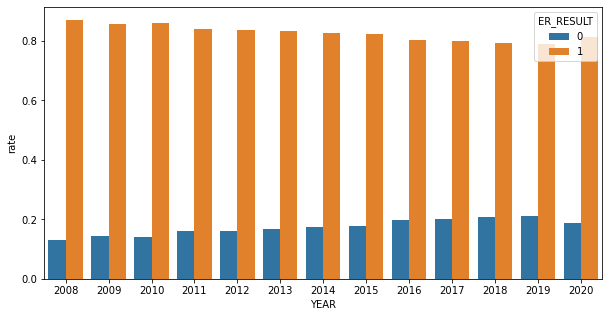

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.barplot(data = temp, x = 'YEAR', y = 'rate', hue = 'ER_RESULT')
plt.show()

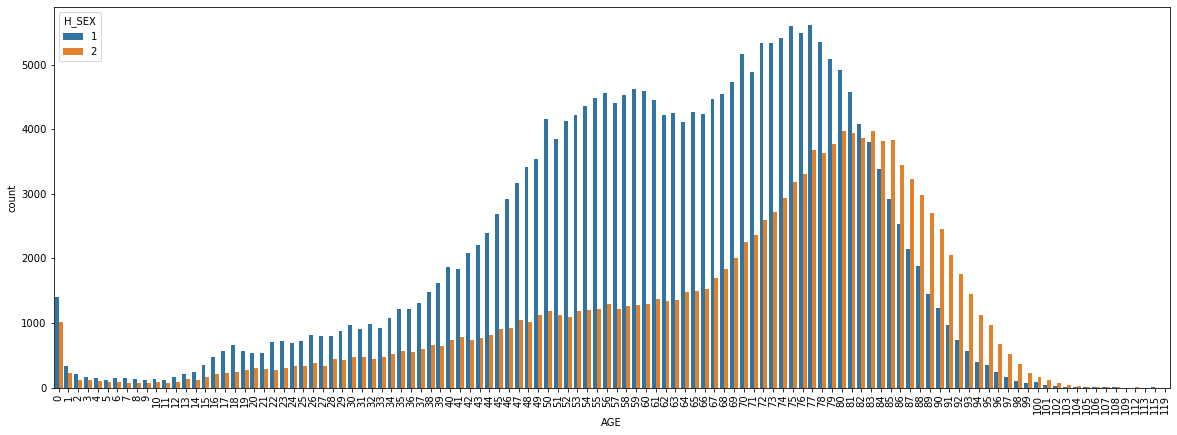

In [16]:
# 나이별로 응급환자
plt.figure(figsize = (20,7))
sns.countplot(data = df, x = 'AGE', hue = 'H_SEX')
plt.xticks(rotation = 90)
plt.show()

In [17]:
# sns.pairplot(data=df, hue='ER_RESULT')
# plt.show()

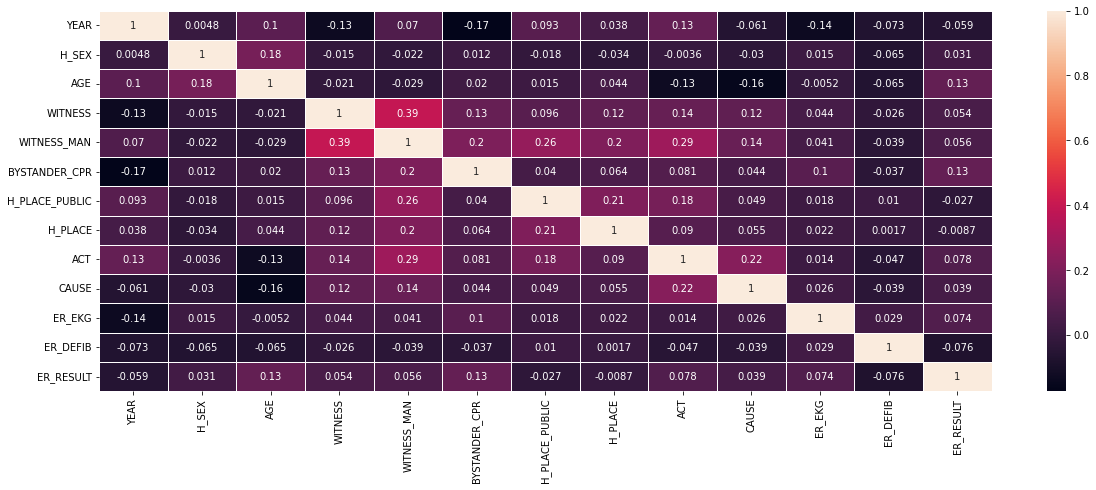

In [18]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(),annot=True, linewidths=1)
plt.show()

In [19]:
# 분류모델을 만들기 위해 연도를 빼줌
df = df.iloc[:,1:]
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
# 스케일링
from sklearn.preprocessing import RobustScaler
x = RobustScaler().fit_transform(x)
x

array([[ 0.        , -0.38461538, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.80769231,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.5       ,  7.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.26923077,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.73076923,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.        ,  0.88461538,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=32)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train), rfc.score(x_test,y_test)

(0.8504427201506111, 0.85064635532104)

In [23]:
from sklearn.model_selection import cross_val_score
cvc = cross_val_score(rfc,x,y,cv=5)
print(cvc)
cvc.mean()

[0.82364357 0.82364357 0.84516075 0.87960228 0.88166962]


0.8507439597221051

In [24]:
# 오래걸림
# from sklearn.svm import SVC
# svc = SVC()
# cvc = cross_val_score(svc,x,y,cv=5)
# print(cvc)
# cvc.mean

In [25]:
# 신경망
# 하이퍼 파라미터
# L = 5 신경망
n_input = 11
n_hidden1 = 256
n_hidden2 = 512
n_hidden3 = 256
n_hidden4 = 128
n_output = 1

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(n_hidden1, activation='relu', input_shape = (n_input,)))
model.add(Dense(n_hidden2, activation='relu'))
model.add(Dense(n_hidden3, activation='relu'))
model.add(Dense(n_hidden4, activation='relu'))
model.add(Dense(n_output, activation='sigmoid'))  # output = 1이기 때문에 sigmoid
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train,y_train, validation_data = (x_test,y_test), batch_size = 36, epochs = 10)

Epoch 1/10
7407/7407 [==============================] - 12s 2ms/step - loss: 0.3673 - accuracy: 0.8524 - val_loss: 0.3593 - val_accuracy: 0.8538
Epoch 2/10
7407/7407 [==============================] - 12s 2ms/step - loss: 0.3575 - accuracy: 0.8553 - val_loss: 0.3619 - val_accuracy: 0.8540
Epoch 3/10
7407/7407 [==============================] - 12s 2ms/step - loss: 0.3552 - accuracy: 0.8559 - val_loss: 0.3552 - val_accuracy: 0.8556
Epoch 4/10
7407/7407 [==============================] - 12s 2ms/step - loss: 0.3541 - accuracy: 0.8564 - val_loss: 0.3531 - val_accuracy: 0.8568
Epoch 5/10
7407/7407 [==============================] - 12s 2ms/step - loss: 0.3532 - accuracy: 0.8570 - val_loss: 0.3539 - val_accuracy: 0.8560
Epoch 6/10
7407/7407 [==============================] - 12s 2ms/step - loss: 0.3525 - accuracy: 0.8570 - val_loss: 0.3540 - val_accuracy: 0.8557
Epoch 7/10
7407/7407 [==============================] - 12s 2ms/step - loss: 0.3519 - accuracy: 0.8572 - val_loss: 0.3529 - val_ac

In [27]:
model.evaluate(x_test,y_test)

2778/2778 [==============================] - 2s 693us/step - loss: 0.3530 - accuracy: 0.8564


[0.3530208170413971, 0.8563617467880249]

In [28]:
y_pred = model.predict(x_test)
y_pred.mean()

0.83193153

# ex2

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [30]:
df = pd.read_excel('./data/급성심장정지조사(08-20)xlsx/ohca_20.xlsx', engine='openpyxl')
df.head(10)

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,...,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,F_ARREST_DT,F_ARREST_TM,F_CALL_DT,F_CALL_TM,F_AED_EKG,F_DEFIB,F_NO_DEFIB,F_PREH_INS
0,1,2020,11110,서울,종로구,28245.0,인천,계양구,1,70,...,서울,중구,20200129,2042,20200129,2042,40.0,1.0,1.0,3.0
1,2,2020,11110,서울,종로구,11140.0,서울,중구,2,78,...,서울,중구,20200228,1835,20200228,1823,40.0,1.0,1.0,1.0
2,3,2020,11110,서울,종로구,11110.0,서울,종로구,1,78,...,서울,중구,20200302,1213,20200302,1211,50.0,1.0,1.0,1.0
3,4,2020,11110,서울,종로구,11110.0,서울,종로구,2,75,...,서울,종로구,20200419,1725,20200419,1725,40.0,1.0,1.0,3.0
4,5,2020,11110,서울,종로구,11110.0,서울,종로구,1,33,...,서울,중구,20200504,0400,20200504,0410,50.0,1.0,1.0,1.0
5,6,2020,11110,서울,종로구,11530.0,서울,구로구,1,82,...,서울,중구,20200506,1137,20200506,1138,40.0,1.0,1.0,3.0
6,7,2020,11110,서울,종로구,11140.0,서울,중구,2,85,...,서울,중구,20200613,1010,20200613,1021,50.0,1.0,1.0,3.0
7,8,2020,11110,서울,종로구,41310.0,경기,구리시,1,47,...,서울,중구,20200620,1330,20200620,1334,20.0,2.0,NaN,3.0
8,9,2020,11110,서울,종로구,11140.0,서울,중구,2,78,...,서울,중구,20200804,1953,20200804,1953,40.0,1.0,1.0,1.0
9,10,2020,11110,서울,종로구,11470.0,서울,양천구,1,73,...,서울,중구,20200818,1314,20200818,1314,20.0,2.0,NaN,3.0


In [31]:
# df.ER_RESULT 라벨링 분류
df.ER_RESULT.isnull().sum()

0

In [32]:
temp = df.isnull().mean()
pd.DataFrame(temp[temp>0]).reset_index()

,index,0
0,P_ADMINCODE,0.024477
1,PRE_ER_ARREST_DT,0.499252
2,PRE_ER_ARREST_TM,0.499252
3,LAST_NORM_DT,0.552694
4,LAST_NORM_TM,0.552694
...,...,...
165,H2_CPC,0.985358
166,F_AED_EKG,0.024254
167,F_DEFIB,0.024254
168,F_NO_DEFIB,0.193621


In [33]:
pd.DataFrame(temp[temp>0]).shape

(170, 1)

<AxesSubplot:xlabel='index', ylabel='0'>

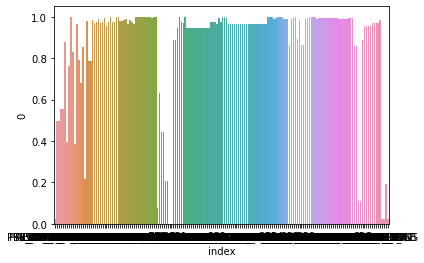

In [34]:
# 결측치 시각화
import matplotlib.pylab as plt
import seaborn as sns

sns.barplot(x=pd.DataFrame(temp[temp>0]).reset_index()['index'],
            y=pd.DataFrame(temp[temp>0]).reset_index()[0])

In [35]:
pd.options.display.max_columns=None # 모든 컬럼 보기
df.head(10)

,NUM,YEAR,H_ADMINCODE,H_ADD_CITY,H_ADD_DIST,P_ADMINCODE,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,INS,PRE_ER_ROSC,WITNESS,PRE_ER_ARREST_DT,PRE_ER_ARREST_TM,LAST_NORM_DT,LAST_NORM_TM,WITNESS_MAN,WITNESS_MAN1,WITNESS_MAN2,BYSTANDER_CPR,BYSTANDER_CPR_ELSE,BYSTANDER_AED,H_PLACE_PUBLIC,H_PLACE1,H_PLACE2,H_PLACE_OTHER,H_PLACE,H_PLACE_FLOOR,ACT,ACT_VITAL_ACTIVITY,ACT_OTHER,CAUSE,CAUSE_DISEASE,CAUSE_DISEASE_OTHER,CAUSE_MECH,CAUSE_INTENT,PHX_HTN,PHX_DM,PHX_HEART,PHX_HEART_1,PHX_HEART_2,PHX_HEART_3,PHX_HEART_4,PHX_HEART_5,PHX_HEART_6,PHX_HEART_7,PHX_HEART_8,PHX_HEART_9,PHX_HEART_10,PHX_RENAL,PHX_RENAL_1,PHX_RENAL_2,PHX_RENAL_3,PHX_RENAL_9,PHX_RESPI,PHX_RESPI_1,PHX_RESPI_2,PHX_RESPI_3,PHX_RESPI_9,PHX_STROKE,PHX_STROKE_1,PHX_STROKE_2,PHX_STROKE_9,PHX_DYSLIPI,PHX_DYSLIPI_1,PHX_DYSLIPI_9,PHX_ALCOHOL,PHX_SMOKE,POISON_0,POISON_1,POISON_2,POISON_3,POISON_4,POISON_5,POISON_6,POISON_7,POISON_8,POISON_9,ER_ADM_DT,ER_ADM_TM,CPR,NO_CPR,ROSC,STOP_CPR,STOP_CPR_DT,STOP_CPR_TM,ER_EKG,ER_EKG_DT,ER_EKG_TM,ER_DEFIB,ER_DEFIB_DT,ER_DEFIB_TM,OP1,OP1_1,OP1_2,OP1_3,OP1_9,OP1_PRE_MENTAL,OP1_PRE_MENTAL_DT,OP1_PRE_MENTAL_TM,OP1_PRE_VITAL_SBP,OP1_PRE_VITAL_DBP,OP1_PRE_VITAL_PR,OP1_PRE_VITAL_RR,OP1_PRE_VITAL_BT,OP1_PRE_VITAL_DT,OP1_PRE_VITAL_TM,OP1_START_DT,OP1_START_TM,OP1_END_DT,OP1_END_TM,OP1_SUCCESS,OP2,OP2_1,OP2_2,OP2_3,OP2_4,OP2_9,OP2_PRE_MENTAL,OP2_PRE_MENTAL_DT,OP2_PRE_MENTAL_TM,OP2_PRE_VITAL_SBP,OP2_PRE_VITAL_DBP,OP2_PRE_VITAL_PR,OP2_PRE_VITAL_RR,OP2_PRE_VITAL_BT,OP2_PRE_VITAL_BT_DT,OP2_PRE_VITAL_BT_TM,OP2_TARGET_BT,OP2_START_DT,OP2_START_TM,OP2_TARGET_DT,OP2_TARGET_TM,OP2_REWARM_DT,OP2_REWARM_TM,OP2_NORM_DT,OP2_NORM_TM,OP2_SUCCESS,OP3,OP3_SURGERY_DT,OP3_SURGERY_TM,OP4,OP4_1,OP4_2,OP4_8,OP4_9,OP4_START_DT,OP4_START_TM,OP4_SUCCESS,OP7,OP7_1,OP7_2,OP7_3,OP7_4,OP7_8,OP7_START_DT,OP7_START_TM,OP8,OP8_1,OP8_2,OP8_3,OP8_8,OP8_9,OP8_PRE_ARREST_STATE,OP8_PRE_MENTAL,OP8_PRE_MENTAL_DT,OP8_PRE_MENTAL_TM,OP8_PRE_VITAL_SBP,OP8_PRE_VITAL_DBP,OP8_PRE_VITAL_PR,OP8_PRE_VITAL_RR,OP8_PRE_VITAL_BT,OP8_PRE_VITAL_DT,OP8_PRE_VITAL_TM,OP8_START_DT,OP8_START_TM,OP8_END_DT,OP8_END_TM,OP8_SUCCESS,OP8_ROSC,OP8_ROSC_DT,OP8_ROSC_TM,ER_RESULT,ER_DC_DT,ER_DC_TM,ADM_RESULT,DC_DT,DTH_DT,DTH_TM,CPC,H2_CHART,H2_ER_RESULT,H2_ER_DC_DT,H2_ER_DC_TM,H2_ADM_RESULT,H2_DC_DT,H2_DTH_DT,H2_DTH_TM,H2_CPC,F_OPEN,F_ADMINCODE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,F_ARREST_DT,F_ARREST_TM,F_CALL_DT,F_CALL_TM,F_AED_EKG,F_DEFIB,F_NO_DEFIB,F_PREH_INS
0,1,2020,11110,서울,종로구,28245.0,인천,계양구,1,70,1,2,2,20200129.0,2042.0,NaN,NaN,1,1.0,NaN,8,NaN,NaN,2,NaN,6.0,NaN,8,NaN,8,NaN,NaN,1,4.0,NaN,NaN,NaN,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,9,NaN,NaN,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200129,2101,3.0,NaN,2.0,2.0,20200129.0,2131.0,9,20200129.0,2101.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,20200130,407,NaN,NaN,20200130.0,341.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,11140,서울,중구,20200129,2042,20200129,2042,40.0,1.0,1.0,3.0
1,2,2020,11110,서울,종로구,11140.0,서울,중구,2,78,1,1,2,20200228.0,9999.0,NaN,NaN,1,1.0,NaN,8,NaN,NaN,2,NaN,1.0,NaN,1,12,8,NaN,NaN,1,3.0,NaN,NaN,NaN,1,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,9,NaN,NaN,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200228,1901,NaN,NaN,NaN,NaN,NaN,NaN,0,20200228.0,1901.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,20200228,2336,N

In [36]:
df.drop(columns=['NUM','YEAR'],inplace=True)

In [38]:
DT_lists = [name for name in df.columns if '_DT' in name]           # 날짜 관련된 columns들은 _DT로 끝남
CITY_lists = [name for name in df.columns if '_CITY' in name]       # 도시
DIST_lists = [name for name in df.columns if '_DIST' in name]       # 구
ADMIN_lists = [name for name in df.columns if '_ADMINCODE' in name] # 병원코드
TM_lists = [name for name in df.columns if '_TM' in name]           # 시각
df.drop(columns=DT_lists,inplace=True)
df.drop(columns=CITY_lists,inplace=True)
df.drop(columns=DIST_lists,inplace=True)
df.drop(columns=ADMIN_lists, inplace=True)
df.drop(columns=TM_lists, inplace=True)

In [39]:
df.head()

,H_SEX,AGE,INS,PRE_ER_ROSC,WITNESS,WITNESS_MAN,WITNESS_MAN1,WITNESS_MAN2,BYSTANDER_CPR,BYSTANDER_CPR_ELSE,BYSTANDER_AED,H_PLACE_PUBLIC,H_PLACE1,H_PLACE2,H_PLACE_OTHER,H_PLACE,H_PLACE_FLOOR,ACT,ACT_VITAL_ACTIVITY,ACT_OTHER,CAUSE,CAUSE_DISEASE,CAUSE_DISEASE_OTHER,CAUSE_MECH,CAUSE_INTENT,PHX_HTN,PHX_DM,PHX_HEART,PHX_HEART_1,PHX_HEART_2,PHX_HEART_3,PHX_HEART_4,PHX_HEART_5,PHX_HEART_6,PHX_HEART_7,PHX_HEART_8,PHX_HEART_9,PHX_HEART_10,PHX_RENAL,PHX_RENAL_1,PHX_RENAL_2,PHX_RENAL_3,PHX_RENAL_9,PHX_RESPI,PHX_RESPI_1,PHX_RESPI_2,PHX_RESPI_3,PHX_RESPI_9,PHX_STROKE,PHX_STROKE_1,PHX_STROKE_2,PHX_STROKE_9,PHX_DYSLIPI,PHX_DYSLIPI_1,PHX_DYSLIPI_9,PHX_ALCOHOL,PHX_SMOKE,POISON_0,POISON_1,POISON_2,POISON_3,POISON_4,POISON_5,POISON_6,POISON_7,POISON_8,POISON_9,CPR,NO_CPR,ROSC,STOP_CPR,ER_EKG,ER_DEFIB,OP1,OP1_1,OP1_2,OP1_3,OP1_9,OP1_PRE_MENTAL,OP1_PRE_VITAL_SBP,OP1_PRE_VITAL_DBP,OP1_PRE_VITAL_PR,OP1_PRE_VITAL_RR,OP1_PRE_VITAL_BT,OP1_SUCCESS,OP2,OP2_1,OP2_2,OP2_3,OP2_4,OP2_9,OP2_PRE_MENTAL,OP2_PRE_VITAL_SBP,OP2_PRE_VITAL_DBP,OP2_PRE_VITAL_PR,OP2_PRE_VITAL_RR,OP2_PRE_VITAL_BT,OP2_TARGET_BT,OP2_SUCCESS,OP3,OP4,OP4_1,OP4_2,OP4_8,OP4_9,OP4_SUCCESS,OP7,OP7_1,OP7_2,OP7_3,OP7_4,OP7_8,OP8,OP8_1,OP8_2,OP8_3,OP8_8,OP8_9,OP8_PRE_ARREST_STATE,OP8_PRE_MENTAL,OP8_PRE_VITAL_SBP,OP8_PRE_VITAL_DBP,OP8_PRE_VITAL_PR,OP8_PRE_VITAL_RR,OP8_PRE_VITAL_BT,OP8_SUCCESS,OP8_ROSC,ER_RESULT,ADM_RESULT,CPC,H2_CHART,H2_ER_RESULT,H2_ADM_RESULT,H2_CPC,F_OPEN,F_AED_EKG,F_DEFIB,F_NO_DEFIB,F_PREH_INS
0,1,70,1,2,2,1,1.0,NaN,8,NaN,NaN,2,NaN,6.0,NaN,8,NaN,8,NaN,NaN,1,4.0,NaN,NaN,NaN,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,9,NaN,NaN,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,2.0,9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,1,40.0,1.0,1.0,3.0
1,2,78,1,1,2,1,1.0,NaN,8,NaN,NaN,2,NaN,1.0,NaN,1,12,8,NaN,NaN,1,3.0,NaN,NaN,NaN,1,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,9,NaN,NaN,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,2.0,1.0,30.0,10.0,2.0,1,40.0,1.0,1.0,1.0
2,1,78,1,2,1,9,NaN,NaN,9,NaN,NaN,1,6.0,NaN,NaN,2,999,7,1.0,NaN,1,1.0,NaN,NaN,NaN,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,9,NaN,NaN,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,1,50.0,1.0,1.0,1.0
3,2,75,1,2,2,1,10.0,NaN,2,1.0,NaN,8,NaN,NaN,8.0,9,NaN,6,NaN,NaN,1,1.0,NaN,NaN,NaN,1,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,1,1.0,NaN,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,1,40.0,1.0,1.0,3.0
4,1,33,1,2,9,9,NaN,NaN,9,NaN,NaN,1,1.0,NaN,NaN,8,NaN,88,NaN,4.0,2,NaN,NaN,1.0,1.0,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,9,NaN,NaN,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,N

In [40]:
# 결측치가 없는 컬럼만 추출
temp = df.isnull().sum()
temp[temp==0].index
lastdf = df.loc[:,temp[temp==0].index]
lastdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31417 entries, 0 to 31416
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   H_SEX           31417 non-null  int64
 1   AGE             31417 non-null  int64
 2   INS             31417 non-null  int64
 3   PRE_ER_ROSC     31417 non-null  int64
 4   WITNESS         31417 non-null  int64
 5   WITNESS_MAN     31417 non-null  int64
 6   BYSTANDER_CPR   31417 non-null  int64
 7   H_PLACE_PUBLIC  31417 non-null  int64
 8   H_PLACE         31417 non-null  int64
 9   ACT             31417 non-null  int64
 10  CAUSE           31417 non-null  int64
 11  PHX_HTN         31417 non-null  int64
 12  PHX_DM          31417 non-null  int64
 13  PHX_HEART       31417 non-null  int64
 14  PHX_RENAL       31417 non-null  int64
 15  PHX_RESPI       31417 non-null  int64
 16  PHX_STROKE      31417 non-null  int64
 17  PHX_DYSLIPI     31417 non-null  int64
 18  PHX_ALCOHOL     31417 non-

In [41]:
lastdf.describe()

,H_SEX,AGE,INS,PRE_ER_ROSC,WITNESS,WITNESS_MAN,BYSTANDER_CPR,H_PLACE_PUBLIC,H_PLACE,ACT,CAUSE,PHX_HTN,PHX_DM,PHX_HEART,PHX_RENAL,PHX_RESPI,PHX_STROKE,PHX_DYSLIPI,PHX_ALCOHOL,PHX_SMOKE,ER_EKG,ER_DEFIB,ER_RESULT,F_OPEN
count,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000,31417.000000
mean,1.362097,66.990292,1.781965,1.923672,1.916319,3.798931,6.608269,3.300029,7.074673,50.963841,1.271318,5.973231,6.658020,7.075437,7.850686,7.820097,7.676640,7.993920,8.427667,8.614349,4.927842,1.113665,37.694719,1.024254
std,0.480614,18.560596,1.976325,0.265527,1.727939,3.214337,3.318592,2.927069,3.135677,44.760498,0.785242,3.799428,3.542027,3.315479,2.672806,2.707079,2.848813,2.512205,2.013023,1.628010,2.129104,0.317408,5.229332,0.153840
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000,1.000000
25%,1.000000,56.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,8.000000,7.000000,1.000000,1.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,1.000000,40.000000,1.000000
50%,1.000000,71.000000,1.000000,2.000000,2.000000,2.000000,9.000000,2.000000,9.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,1.000000,40.000000,1.000000
75%,2.000000,81.000000,1.000000,2.000000,2.000000,9.000000,9.000000,2.000000,9.000000,99.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,1.000000,40.000000,1.000000
max,2.000000,104.000000,9.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,99.000000,2.000000


<AxesSubplot:>

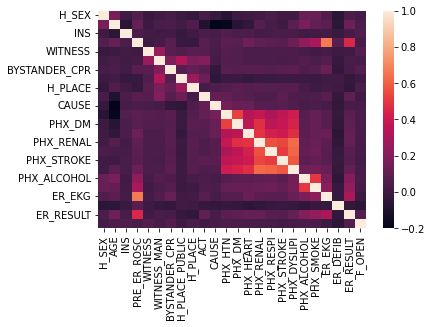

In [42]:
sns.heatmap(lastdf.corr())

In [43]:
np.unique(lastdf.ER_RESULT)

array([10, 21, 22, 30, 40, 41, 88, 99], dtype=int64)

In [44]:
y = lastdf.loc[:,'ER_RESULT']
x = lastdf.drop(columns=['ER_RESULT'])
x.shape, y.shape

((31417, 23), (31417,))

In [45]:
print(np.unique(y))
list(range(len(np.unique(y))))
temp = dict(zip(np.unique(y),range(len(np.unique(y)))) )
y = y.replace(temp)

# y를 one-hot
y = tf.keras.utils.to_categorical(y,8)
y

[10 21 22 30 40 41 88 99]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
# 이상치 유무 확인 시각화
# 데이터 표준화는 이상치에 영향을 받지 않는 RobustScaLer를 사용 (중위수, 사분위수)
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x_rs = rs.fit_transform(x)

In [47]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 3)

In [48]:
# 평균 cross validation
from sklearn.model_selection import cross_val_score
rfc_crossval = cross_val_score(rfc,x_rs,y,cv=2)
rfc_crossval.mean()

0.8456896751837268

## 신경망 모델

In [49]:
# 신경망 : 다층 퍼셉트론
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [50]:
x_rs.shape

(31417, 23)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x_rs,y,random_state=32)

In [52]:
# 신경망 설계
model = Sequential()
model.add(layers.Dense(128,activation='relu', input_shape=(23,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(8,activation='softmax'))

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)]
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=32, epochs=200, validation_data=(x_test,y_test),
          callbacks=callbacks)

Epoch 1/200
737/737 [==============================] - 1s 1ms/step - loss: 0.5599 - accuracy: 0.8414 - val_loss: 0.4340 - val_accuracy: 0.8675
Epoch 2/200
737/737 [==============================] - 1s 992us/step - loss: 0.4563 - accuracy: 0.8628 - val_loss: 0.4202 - val_accuracy: 0.8715
Epoch 3/200
737/737 [==============================] - 1s 886us/step - loss: 0.4415 - accuracy: 0.8638 - val_loss: 0.4210 - val_accuracy: 0.8699
Epoch 4/200
737/737 [==============================] - 1s 877us/step - loss: 0.4351 - accuracy: 0.8657 - val_loss: 0.4170 - val_accuracy: 0.8715
Epoch 5/200
737/737 [==============================] - 1s 934us/step - loss: 0.4283 - accuracy: 0.8668 - val_loss: 0.4147 - val_accuracy: 0.8728
Epoch 6/200
737/737 [==============================] - 1s 861us/step - loss: 0.4217 - accuracy: 0.8685 - val_loss: 0.4136 - val_accuracy: 0.8732
Epoch 7/200
737/737 [==============================] - 1s 890us/step - loss: 0.4172 - accuracy: 0.8703 - val_loss: 0.4209 - val_accu

In [53]:
model.evaluate(x_test,y_test)

246/246 [==============================] - 0s 552us/step - loss: 0.4076 - accuracy: 0.8745


[0.4075702130794525, 0.8744748830795288]

In [54]:
# 예측치
predict_test = np.argmax(model.predict(x_test),axis=1)
predict_test

array([4, 4, 4, ..., 4, 4, 3], dtype=int64)

In [55]:
len(predict_test), x_test.shape

(7855, (7855, 23))

In [56]:
# cnn 적용 ccpd f fc d fc
cnn_model = Sequential()
cnn_model.add(layers.Conv1D(36,3,activation='relu',input_shape=(23,1))) # c
cnn_model.add(layers.Conv1D(64,3,activation='relu'))                    # c
cnn_model.add(layers.MaxPooling1D(2))                                   # p
cnn_model.add(layers.Dropout(0.25))                                     # d

cnn_model.add(layers.Conv1D(36,3,activation='relu'))                    # c
cnn_model.add(layers.Conv1D(64,3,activation='relu'))                    # c
cnn_model.add(layers.MaxPooling1D(2))                                   # p
cnn_model.add(layers.Dropout(0.25))                                     # d

cnn_model.add(layers.Flatten())                                         # f

cnn_model.add(layers.Dense(64,activation='relu'))                       # fc
cnn_model.add(layers.Dropout(0.5))                                      # d
cnn_model.add(layers.Dense(8,activation='softmax'))                     # fc

In [57]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)]
cnn_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
hist = cnn_model.fit(x_train,y_train,batch_size=32, epochs=200, validation_data=(x_test,y_test),
                 callbacks=callbacks,
                 verbose = 2)

Epoch 1/200
737/737 - 2s - loss: 0.6405 - accuracy: 0.8070 - val_loss: 0.5331 - val_accuracy: 0.8153 - 2s/epoch - 3ms/step
Epoch 2/200
737/737 - 2s - loss: 0.5392 - accuracy: 0.8209 - val_loss: 0.4711 - val_accuracy: 0.8429 - 2s/epoch - 2ms/step
Epoch 3/200
737/737 - 2s - loss: 0.4943 - accuracy: 0.8456 - val_loss: 0.4415 - val_accuracy: 0.8693 - 2s/epoch - 2ms/step
Epoch 4/200
737/737 - 2s - loss: 0.4704 - accuracy: 0.8568 - val_loss: 0.4413 - val_accuracy: 0.8658 - 2s/epoch - 2ms/step
Epoch 5/200
737/737 - 2s - loss: 0.4663 - accuracy: 0.8572 - val_loss: 0.4300 - val_accuracy: 0.8673 - 2s/epoch - 2ms/step
Epoch 6/200
737/737 - 2s - loss: 0.4600 - accuracy: 0.8596 - val_loss: 0.4332 - val_accuracy: 0.8652 - 2s/epoch - 2ms/step
Epoch 7/200
737/737 - 2s - loss: 0.4549 - accuracy: 0.8610 - val_loss: 0.4302 - val_accuracy: 0.8677 - 2s/epoch - 2ms/step
Epoch 8/200
737/737 - 2s - loss: 0.4504 - accuracy: 0.8616 - val_loss: 0.4220 - val_accuracy: 0.8698 - 2s/epoch - 2ms/step
Epoch 9/200
737/

In [58]:
cnn_model.evaluate(x_test,y_test)

246/246 [==============================] - 0s 832us/step - loss: 0.4152 - accuracy: 0.8729


[0.41521674394607544, 0.8729471564292908]

In [59]:
# 평가 confusion maxtrix
# 의료용 : 특이도, 정밀도
from sklearn.metrics import confusion_matrix
cnn_model_predict = cnn_model.predict(x_test)
cnn_model_predict = np.argmax(cnn_model_predict,axis=1)

print(cnn_model_predict)
print(np.argmax(y_test,axis=1))
# y_test는 one_hot으로 변경되었기 때문에 해당 레이블을 max의 인덱스로 디코딩

cm = confusion_matrix(np.argmax(y_test,axis=1),cnn_model_predict)

[4 4 4 ... 4 4 3]
[4 4 4 ... 4 4 3]


In [60]:
cm

array([[   0,    1,    0,    7,    2,    0,    0,    0],
       [   0,    6,    0,   89,  272,    0,    0,    0],
       [   0,    0,    0,    0,    3,    0,    0,    0],
       [   0,    2,    0,  543,  520,    0,    0,    0],
       [   0,    4,    0,   92, 6308,    0,    0,    0],
       [   0,    0,    0,    2,    1,    0,    0,    0],
       [   0,    0,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# precision_score : 정밀도
# recall_score : 재현율 = 민감도
# 정밀도와 재현율은 trade-off 관계

In [62]:
# print(f"정밀도 : {precision_score(np.argmax(y_test,axis=1),cnn_model_predict)}")
# print(f"재현율 : {recall_score(np.argmax(y_test,axis=1),cnn_model_predict)}")

### 추가로 해볼 수 있는것
1. 범주형 데이터를 one-hot
2. 사망과 그 외를 나눠서 이진 분류로 수행